# California House price 

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.base import BaseEstimator, TransformerMixin

## 1) Load Data 

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()   # Quick look at data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Quick description of data 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# categories in ocean_proximity column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# Summary of each numerical attribute
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 2) Doing some Exploratory Data Analysis 

### 1) Looking for correlations & Scatter plots

In [6]:
housing.iloc[:, :-1].corr()["median_house_value"] # median_income is highly correlated with median_house_value 

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

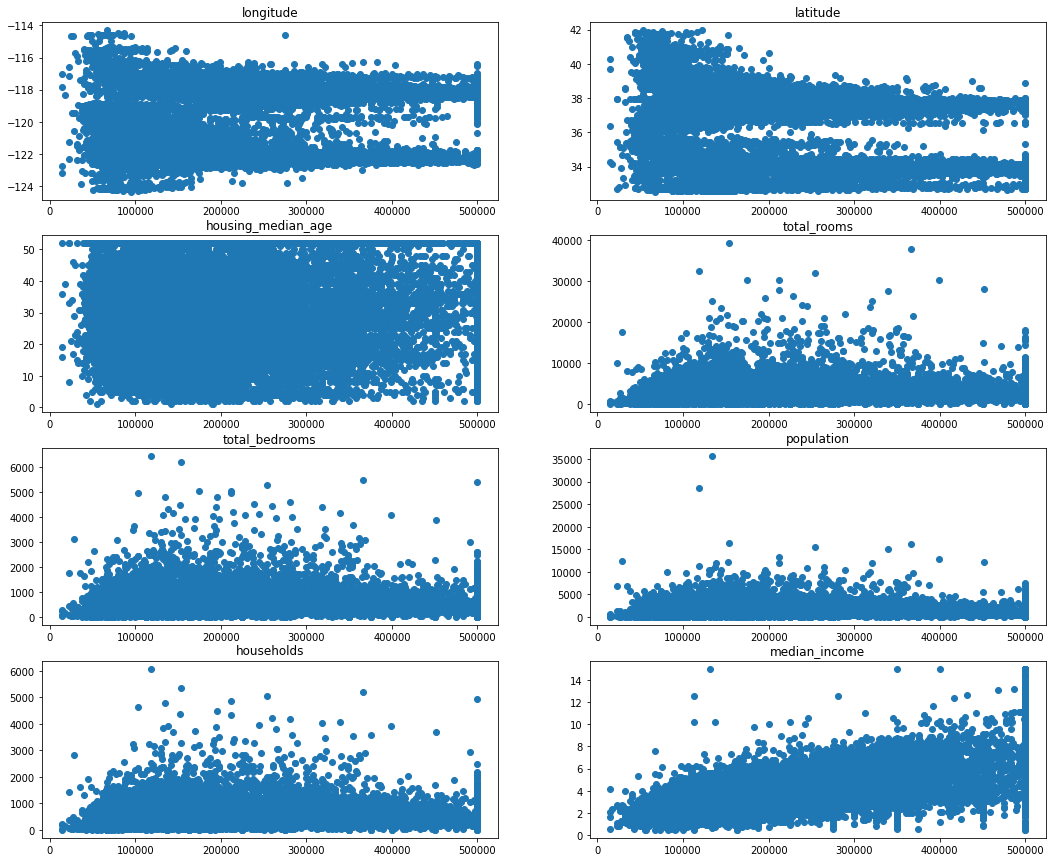

In [7]:
cols = np.split(housing.columns.drop(['median_house_value',
                                      'ocean_proximity']), 4)
m, n = 4, 2
fig, axs = plt.subplots(m, n)
for num1 in range(m):
    for num2 in range(n):
        axs[num1, num2].scatter(housing["median_house_value"],
                                housing[cols[num1][num2]])
        axs[num1, num2].set_title(cols[num1][num2])     
fig.set_size_inches(18, 15)        
plt.show()

Note 

The plots above drawn shows very strong correlation between median_income and median_house_value

### 2) Experimenting with attribute combinations 

In [8]:
# Create new attributes & Checking correlations
rooms_per_household = housing["total_rooms"]/ housing["households"]
housing["median_house_value"].corr(rooms_per_household)

0.15194828974145783

In [9]:
bedrooms_per_room = housing["total_bedrooms"]/ housing["total_rooms"]
housing["median_house_value"].corr(bedrooms_per_room)

-0.25588014941949816

In [10]:
population_per_household = housing["population"]/ housing["households"]
housing["median_house_value"].corr(population_per_household)

-0.023737412956134338

Note 

We have now two more informative series rooms_per_household &  bedrooms_per_room

### 3) Looking at histograms 

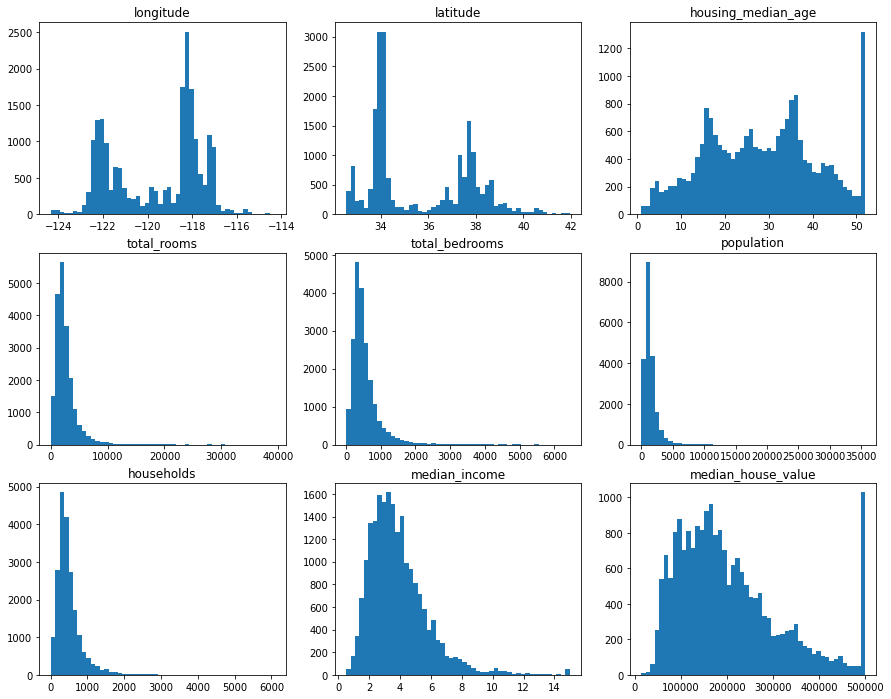

In [11]:
m , n = 3, 3
col = np.split(housing.columns.drop(['ocean_proximity']), 3)
fig, axs = plt.subplots(m, n)
for num1 in range(m):
    for num2 in range(n):
        axs[num1, num2].hist(housing[col[num1][num2]], bins=50)
        axs[num1, num2].set_title(col[num1][num2])
fig.set_size_inches(15, 12)        
plt.show()

Note

1) median_income attribute is capped, can be seen from the histogram

2)housing_median_age and median_house value are also capped, we need to collect proper labels 

## 3) Prepare Data for Machine learning 

### 1) Train test split

In [12]:
# Stratified test train split on the basis of income category 
income_cat = pd.cut(housing["median_income"],
                    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                    labels=[1, 2, 3, 4, 5])

train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42,
                                       stratify=income_cat)

In [13]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


### 2) Separate labels & features from training set

In [15]:
train_features = train_set.drop("median_house_value", axis=1)
train_labels = train_set["median_house_value"].copy()
train_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [16]:
train_labels.head()

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

### 3) Pipelines & column transformer & Getting prepared training set

In [17]:
# Class to add new columns 

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


# pipeline for numerical attributes 
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                        ])


num_attribs = train_features.columns.drop(['ocean_proximity'])
cat_attribs = ["ocean_proximity"]

# Complete pipeline for complete training set transformation
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [18]:
train_prepared = full_pipeline.fit_transform(train_features)
train_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

### 4) Training and evaluating on training set

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [20]:
# Lets check it on few instance of training set
some_data = train_features[:5]
some_labels = train_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
lin_reg.predict(some_data_prepared)

array([ 85440., 305856., 152128., 186368., 244416.])

In [21]:
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [22]:
# Measure Regression model RMSE on whole training set
train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68631.74609085765

### 5) How it is working with test set

In [23]:
# Separating test features & labels
test_features = test_set.drop("median_house_value", axis=1)
test_labels = test_set["median_house_value"].copy()
test_features.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN


In [24]:
test_features_prepared = full_pipeline.transform(test_features)
test_predict = lin_reg.predict(test_features_prepared)
test_predict

array([424384., 291904., 242240., ..., 310592., 266432., 238464.])

In [25]:
test_labelarr = test_labels.to_numpy()
test_labelarr

array([500001., 162500., 204600., ..., 293800., 335700., 215600.])

In [26]:
# RMSE on Test set
lin_mse = mean_squared_error(test_labelarr, test_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

66913.16498014335